Anna Zoi - TH20179 - HMU

Install dependencies

-pip install pandas

-pip install matplotlib

-pip install scikit-learn

Car Evaluation dataset

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

Step 1 - Load the Car Evaluation dataset 

In [18]:
col_names_car=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Load dataset
df_car = pd.read_csv('car.data',delim_whitespace=False, header=None)

df_car.columns=col_names_car

# Display the first few rows of the dataset
print(df_car.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


C:\Users\zoian\AppData\Local\Temp\ipykernel_3232\4248066084.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_car = pd.read_csv('car.data',delim_whitespace=False, header=None)


Step 2 - Encode categorical features to numerical values

In [19]:
label_encoder = LabelEncoder()

for col in df_car.columns:
    df_car[col] = label_encoder.fit_transform(df_car[col])

df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Step 3 - Split the Data into a training (80%) and a test set (20%)

In [20]:
# Separate features and target variable
X=df_car.iloc[:, :-1]
y=df_car.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 1382
Test set size: 346


Step 4 - Train a multilayer perceptron.  Experiment with Different MLP Configurations and record the results

In [21]:
# Define configurations
configs=[(32,),(64,),(32, 16),(64, 32),(64, 32, 16)]

# Define an empty array
results=[]

for config in configs:
    mlp=MLPClassifier(hidden_layer_sizes=config, max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred=mlp.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    results.append({'config': config, 'accuracy': accuracy})
    print(f"Config: {config}, Accuracy: {accuracy}")

# Find the best configuration
best_config=max(results, key=lambda x: x['accuracy'])
print(f"Best Configuration: {best_config['config']}, Accuracy: {best_config['accuracy']}")

c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: (32,), Accuracy: 0.9479768786127167


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: (64,), Accuracy: 0.9710982658959537


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: (32, 16), Accuracy: 0.9855491329479769
Config: (64, 32), Accuracy: 0.9797687861271677
Config: (64, 32, 16), Accuracy: 0.976878612716763
Best Configuration: (32, 16), Accuracy: 0.9855491329479769


Step 5 - For the best-performing MLP configuration experiment with different training sizes (10%-70%) and evaluate the results

In [22]:
training_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
training_results=[]

for size in training_sizes:
    X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=best_config['config'], max_iter=500, random_state=42)
    mlp.fit(X_train_small, y_train_small)
    y_pred=mlp.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    training_results.append({'size': size, 'accuracy': accuracy})
    print(f"Training Size: {size}, Accuracy: {accuracy}")

Training Size: 0.1, Accuracy: 0.7398843930635838


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Size: 0.2, Accuracy: 0.8179190751445087


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Size: 0.3, Accuracy: 0.8236994219653179


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Size: 0.4, Accuracy: 0.8988439306358381


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Size: 0.5, Accuracy: 0.9335260115606936


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Size: 0.6, Accuracy: 0.9364161849710982
Training Size: 0.7, Accuracy: 0.9595375722543352


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Step 6 - Plot the training loss curve for the different training set sizes

c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

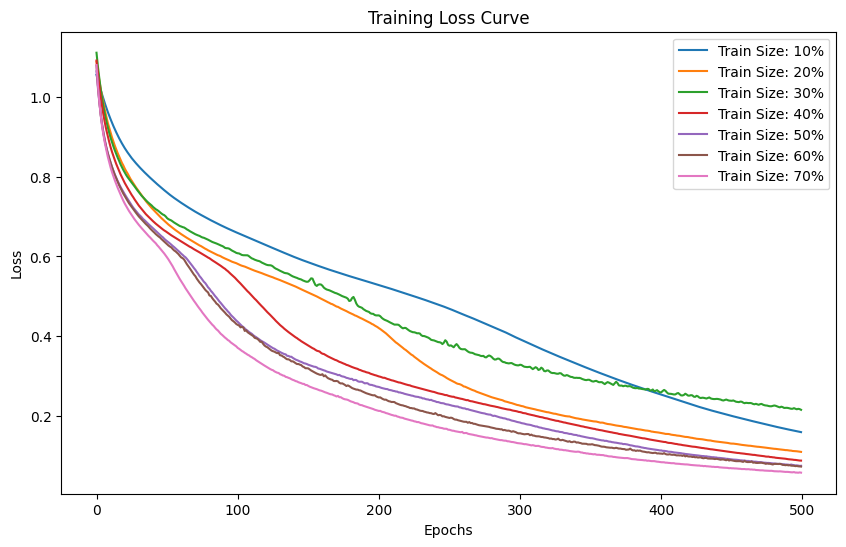

In [23]:
# Visualize the training loss curve for different training set sizes

plt.figure(figsize=(10, 6))
for size in training_sizes:
    X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=best_config['config'], max_iter=500, random_state=42)
    mlp.fit(X_train_small, y_train_small)
    plt.plot(mlp.loss_curve_, label=f'Train Size: {int(size * 100)}%')

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Auto MPG Dataset

Step 1 - Load and Preprocess the Auto MPG Dataset 

In [24]:
col_names_auto=['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Load the dataset
df_auto=pd.read_csv('auto-mpg.data', delim_whitespace=True, names=col_names_auto)

# Display the first few rows
print(df_auto.head())

# Handle missing values
df_auto['horsepower']=pd.to_numeric(df_auto['horsepower'], errors='coerce')
df_auto=df_auto.dropna()

# Drop the car_name column as it is not relevant
df_auto=df_auto.drop(columns=['car_name'])

# Display dataset totaly
print("\n")
print("Total")
print(df_auto.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Total
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  


C:\Users\zoian\AppData\Local\Temp\ipykernel_3232\3547521217.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_auto=pd.read_csv('auto-mpg.data', delim_whitespace=True, names=col_names_auto)


Step 2 - Split Data into a training (70%) and a test set (30%)

In [25]:
# Separate features and target variable
X=df_auto.drop(columns=['mpg'])
y=df_auto['mpg']

# Split data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 274
Test set size: 118


Step 3 - Standardize the feature values to have zero mean and unit variance

In [26]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4 - Build and Train the MLP Regressor. Use hidden layers with sizes (64, 32, 16)


In [27]:
# Define the MLP Regressor
mlp=MLPRegressor(hidden_layer_sizes=(64, 32, 16),activation='relu',solver='adam',max_iter=500,random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred=mlp.predict(X_test_scaled)

print("Training complete")

Training complete


c:\Users\zoian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Step 5 - Evaluate the Model the model's performance using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics

In [28]:
# Calculate MSE and MAE
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 6.33
Mean Absolute Error (MAE): 1.80


Step 6 - Show Predictions vs. Actual Values 



In [29]:
# Create a DataFrame for comparison
results_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

print(results_df.head())

     Actual  Predicted
79     26.0  25.915007
276    21.6  20.156169
248    36.1  35.585328
56     26.0  24.797493
393    27.0  28.087273


Step 7 - Plot the training loss curve to visualize model convergence

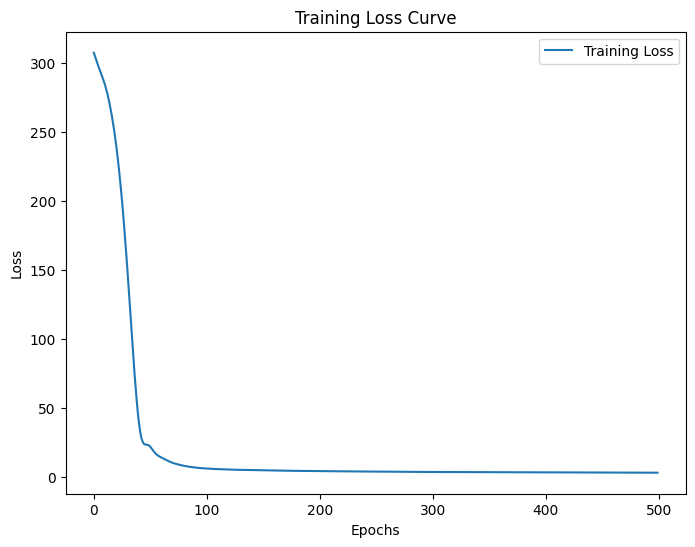

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()